In [139]:
# Loading libraries for the course
import os
import random
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
from matplotlib import animation            # Module to plot animations
import seaborn as sn                        # Library for advanced plotting
import skimage                              # Library for image manipulation (scikit-image)
from skimage.io import imread, imshow       # Module from skimage
from skimage import io, measure, filters, morphology, segmentation, color, feature
from skimage.filters import gaussian, threshold_otsu, difference_of_gaussians
from skimage.morphology import (binary_dilation, binary_erosion, binary_closing, 
                                binary_opening, disk, remove_small_objects)
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.segmentation import watershed
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from PIL import Image
import cellpose

%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from cellpose import plot, models

In [140]:
#I want to open a folder of tiff files and read each file
import os 
path = '/Users/pilarameijeiras/Documents/Prueba tiff/' #this is the path to the folder where the tiff files are
files = os.listdir(path) #this will list all the files in the folder 
for file in files: #this will loop over all the files in the folder
    open_tiff = imread(path + file) #this will open the tiff file
    img = open_tiff
    

In [141]:
metadata = {'frame_number':[], 'cell_number':[], 'alive':[], 'cell_areas':[], 'nuclei_areas':[], 'protein_concentration':[], 'number_of_mRNA_in_nucleus':[], 'number_of_mRNA_in_cytoplasm':[], 'number_of_transcription_sites':[], 'intensity_of_transcription_sites':[]}
metadata = {'frame_number':[], 'cell_number':[], 'alive':[], 'cell_areas':[], 'nuclei_areas':[], 'protein_concentration':[]}


In [142]:
#PROBLEMS

#If i use sigma 2 to segment the cytoplasm, the cytoplasm is not segmented correctly it detetcs more cells than it should
#If i use sigma 1 to segment the cytoplasm, i have a similar problem, it detects a wieird shape that is not the cytoplasm

#i need to label the cells with a number to be able to track them in the next frames and list their properties in the metadata dictionary

#i dont know how to create the csv with the correct format of the metadata dictionary

# csv problem

number of detected cells:  12


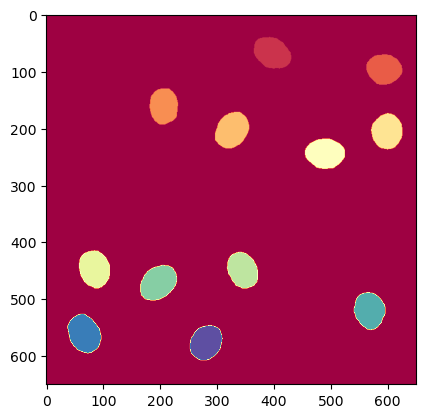

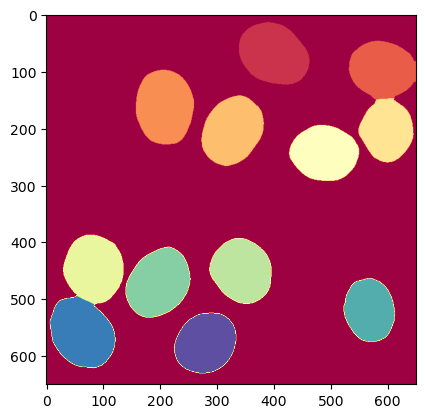

The area of the cells is:  [10373, 9344, 10667, 10063, 7979, 9217, 9814, 9500, 10416, 7775, 10741, 8968]
The coordinates of the cells are:  [67.87162162162163, 96.5318164288469, 161.49664958612536, 203.61922811853893, 205.79362101313322, 244.70396108408616, 447.5439285714286, 449.64469696969695, 471.685799601858, 520.3551952837141, 561.1760161236144, 576.8555431131019] [396.9178520625889, 593.6116467412264, 206.5297595585337, 326.37698139214336, 598.8090056285179, 489.85962473940236, 84.83642857142857, 345.0693181818182, 196.95952222959522, 567.9966838614591, 66.95129324823648, 280.8073908174692]
The area of the nuclei is:  [2812, 2593, 2537, 2902, 2665, 2878, 2800, 2640, 3014, 2714, 2977, 2679]
The protein concentration of the cells is:  [0.2674016126791256, 0.2614955349157444, 0.2697979069876708, 0.26201739436690896, 0.26284522565918633, 0.29623186302676274, 0.25834321217139994, 0.2632634251018489, 0.26969933276867597, 0.268865135004269, 0.25150589551125496, 0.31623661679155884]
numb

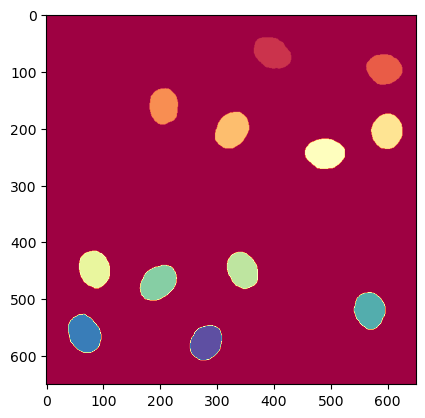

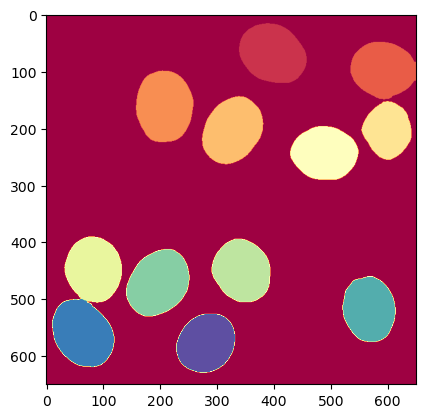

The area of the cells is:  [9604, 8856, 10055, 9516, 6497, 8706, 8980, 8796, 9814, 8360, 9794, 8330]
The coordinates of the cells are:  [67.98293636686812, 96.40747879722436, 161.51529411764704, 203.5167349726776, 205.5702385460053, 244.7480995162405, 447.77410071942444, 449.7235621521336, 471.6120345744681, 520.1879615952732, 561.2722972972973, 576.8167166416791] [396.83505154639175, 593.8346183500386, 206.50039215686274, 326.30225409836066, 598.6679288148429, 489.78749136143745, 84.768345323741, 344.9617810760668, 196.79521276595744, 568.2219350073855, 67.18243243243244, 280.87256371814095]
The area of the nuclei is:  [2813, 2594, 2550, 2928, 2641, 2894, 2780, 2695, 3008, 2708, 2960, 2668]
The protein concentration of the cells is:  [0.27058880002174174, 0.2673031205214435, 0.27211783226140795, 0.2625855769099562, 0.27775176155701375, 0.3023129333099573, 0.2654903697921683, 0.2696682684701378, 0.27516857520962584, 0.26921660206470305, 0.2542899229779331, 0.3229786266102293]
number of

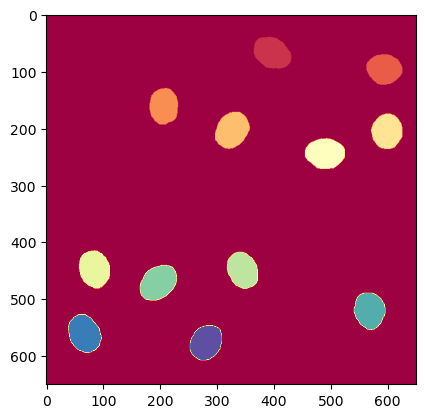

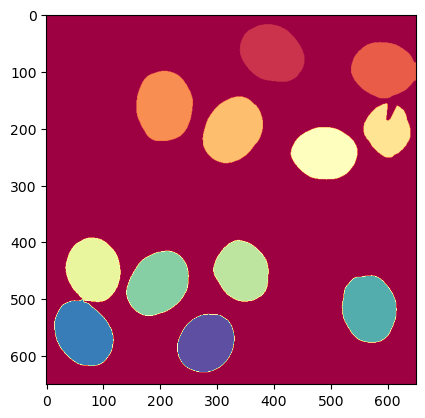

The area of the cells is:  [8857, 8605, 9734, 9224, 5402, 8298, 8427, 7871, 9370, 8886, 8948, 7966]
The coordinates of the cells are:  [67.89286968739023, 96.46795366795367, 161.51791277258567, 203.530868385346, 205.72500943040362, 244.67633015006822, 447.7154617036507, 449.80630797773654, 471.5603278688525, 520.4077205882353, 561.1297500855871, 576.7040626164741] [396.79346680716543, 593.8957528957529, 206.6152647975078, 326.52001356852105, 598.7231233496793, 489.87141882673944, 84.73765211166786, 345.0482374768089, 196.86491803278687, 568.0536764705882, 67.22252653200958, 280.83973164368246]
The area of the nuclei is:  [2847, 2590, 2568, 2948, 2651, 2932, 2794, 2695, 3050, 2720, 2921, 2683]
The protein concentration of the cells is:  [0.2733089239604082, 0.27184525452022995, 0.2723188594231918, 0.2581934779597124, 0.28982465580825467, 0.3064454505633854, 0.2717684493167672, 0.2788930472125529, 0.27828598797049825, 0.2728339231610376, 0.2541809163227479, 0.3248797329138998]
number of 

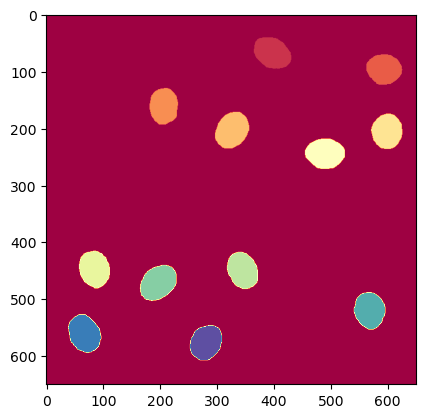

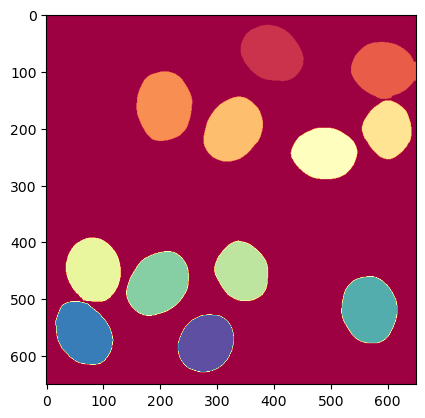

The area of the cells is:  [8338, 8655, 9436, 8905, 6577, 8116, 8475, 7535, 9353, 9032, 8457, 7756]
The coordinates of the cells are:  [67.920313055852, 96.55546965597217, 161.38341158059467, 203.65068493150685, 205.71987837324212, 244.70745233968805, 447.71715328467155, 450.02001482579686, 471.6355791569864, 520.1489518205223, 561.0696136442742, 576.6994760479042] [397.0672358591249, 593.5500579822187, 206.54381846635368, 326.4503424657534, 598.7689091600153, 489.93379549393416, 84.74671532846715, 345.04484803558194, 196.85894457351478, 568.1901434350864, 67.24051514096763, 280.77245508982037]
The area of the nuclei is:  [2811, 2587, 2556, 2920, 2631, 2885, 2740, 2698, 3013, 2719, 2873, 2672]
The protein concentration of the cells is:  [0.27374382963663846, 0.2730939153363921, 0.2731469495037701, 0.2495190235191136, 0.28183941944113095, 0.30632579593584625, 0.2731670834183477, 0.28248437921589953, 0.27393063349707647, 0.2824130071980909, 0.24746627939828025, 0.3236942262448275]
number

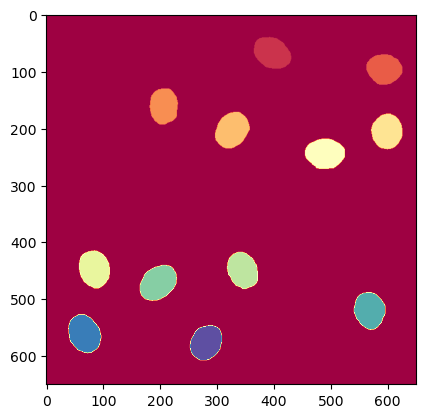

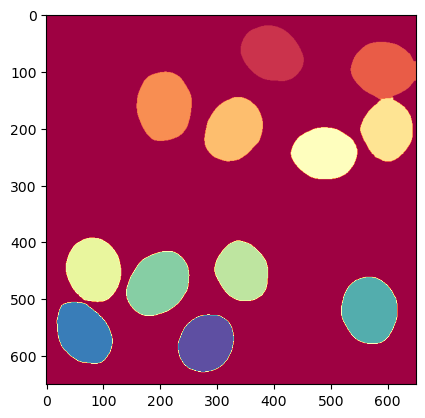

The area of the cells is:  [8289, 8729, 9364, 8783, 7532, 8190, 8532, 7584, 9479, 9071, 8009, 7736]
The coordinates of the cells are:  [67.96533427661832, 96.43667953667953, 161.4681188118812, 203.5129265770424, 205.8741972043823, 244.88777969018932, 447.58693323812923, 449.7911841613747, 471.74342105263156, 520.1514484781811, 561.3079278666213, 576.8335212326193] [396.8666430845419, 593.8413127413128, 206.5211881188119, 326.4891416752844, 598.7000377786173, 489.7872633390706, 84.60549803641557, 345.09376167351513, 196.66809210526316, 568.0810414374771, 67.19360326641714, 280.9808342728298]
The area of the nuclei is:  [2827, 2590, 2525, 2901, 2647, 2905, 2801, 2677, 3040, 2727, 2939, 2661]
The protein concentration of the cells is:  [0.27004102182420164, 0.2718830910067894, 0.27332594812106864, 0.23549001604544123, 0.2761049898856038, 0.3014295429920576, 0.27453731004479814, 0.2816482367148071, 0.26256231611896186, 0.2936813541689427, 0.23582632690733948, 0.3192996576593304]
number of 

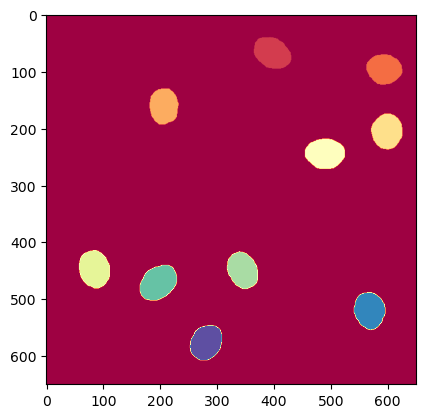

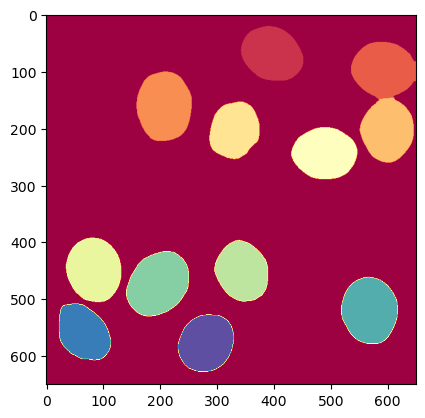

The area of the cells is:  [8091, 8728, 9460, 8089, 6888, 8159, 8560, 7654, 9493, 9057, 6922, 7722]
The coordinates of the cells are:  [67.98793470546487, 96.48390849166344, 161.56464174454828, 205.73847883102286, 244.86430276167746, 447.709802538787, 449.82581126445353, 471.6334531198955, 520.3244622675902, 576.7391142538147] [397.0024840312278, 593.765800697945, 206.67445482866043, 598.7163731734732, 489.7964541425162, 84.68617771509167, 345.0686311077956, 196.90101274093433, 568.0339044841414, 281.0338667659099]
The area of the nuclei is:  [2818, 2579, 2568, 2669, 2933, 2836, 2681, 3061, 2743, 2687]
The protein concentration of the cells is:  [0.2683117931227671, 0.2670913108486866, 0.2731968125819404, 0.27505427072789257, 0.22623664607802932, 0.2962400021107446, 0.27644239923107505, 0.27972450687099054, 0.24629492314352291, 0.3026704005367796, 0.22399458529708266, 0.3143395967777903]


KeyError: 11

In [144]:
#channel 0: red, nuclei
#channel 1: green, cytoplasm and protein
#channel 2: blue, mRNA and transcription sites

for file in files:
    
    for zSlice in range(img.shape[0]):
    # Segmenting the nuclei from the image using the first frame of the tiff file
        img_nuc= img[zSlice,:,:,0:1] #change the 2 for a 1 to use the first channel
        use_GPU = False  # Set to True if you have a GPU - this will make it MUCH faster.
        model = models.Cellpose(gpu=use_GPU, model_type='nuclei') # model_type='cyto' or model_type='nuclei'
        masks_nuc = model.eval(img_nuc, diameter=100, channels=[0,1])[0]
        print('number of detected cells: ', np.max(masks_nuc))
        plt.imshow(masks_nuc,cmap='Spectral')
        plt.show()

        # Segmenting the cytosol from the image using the first frame of the tiff file
        #maybe i can use a gaussian filter to smooth the image and then segment the cytosol for a better result
        img_blur = gaussian(img, sigma=2) 
        img_cyto = img_blur[zSlice,:,:,1:2] #chance the 0 for a 1 to use the second channel
        use_GPU = False
        model = models.Cellpose(gpu=use_GPU, model_type='cyto2') # model_type='cyto', 'cyto2' or model_type='nuclei'
        masks_cyto, flows, styles, diams = model.eval(img_cyto, diameter=200, channels=[0,2])
        plt.imshow(masks_cyto,cmap='Spectral')
        plt.show()

        cell_areas = []
        for i in range(1, np.max(masks_cyto)+1):
                cell_areas.append(np.sum(masks_cyto==i))
        print('The area of the cells is: ', cell_areas[:12])
        #i want to get the coordinates of the cells to be able to track them in the next frames
        #i will use the masks_nuc to get the coordinates of the cells
        x = []
        y = []
        for i in range(1, np.max(masks_nuc)+1):
            x.append(np.mean(np.where(masks_nuc==i)[0]))
            y.append(np.mean(np.where(masks_nuc==i)[1]))
        print('The coordinates of the cells are: ', x[:12], y[:12])

        #I want to know if the cell is alive or dead
        #I will consider that a cell is dead if it doesn't have nuclei
        #I will consider that a cell is alive if it has nuclei
        #I will use the masks_nuc to determine if the cell is alive or dead
        #I will asing a 1 to the cell if it is alive and a 0 if it is dead
        alive = []
        for i in range(1, np.max(masks_nuc)+1):
            if np.sum(masks_nuc==i) > 0:
                #asing a 1 to the cell if it is alive
                alive.append(1)
            else:
                #asing a 0 to the cell if it is dead
                alive.append(0)

        #I want to calculate the area of the nuclei of the cells
        #I will use the masks_nuc to determine the area of the nuclei of the cells
        nuclei_areas = []
        for i in range(1, np.max(masks_nuc)+1):
            nuclei_areas.append(np.sum(masks_nuc==i))
        print('The area of the nuclei is: ', nuclei_areas[:12])

        #I want to calculate the protein concentration of the cells that is the intensity of the cytosol in channel 2
        #I will use the masks_cyto to determine the protein concentration of the cells
        protein_concentration = []
        for i in range(1, np.max(masks_cyto)+1):
            protein_concentration.append(np.mean(img_cyto[:,:,0][masks_cyto==i])) #channel 1 is the cytosol and contains the protein
        print('The protein concentration of the cells is: ', protein_concentration[:12])
        
                # Use dictionaries to map cell numbers to their properties
        alive_dict = {i: 1 if np.sum(masks_nuc==i) > 0 else 0 for i in range(1, np.max(masks_nuc)+1)} # 1 if alive, 0 if dead
        #cell_areas_dict = i need to asing 0 if the cell is dead and the area of the cell if it is alive
        cell_areas_dict = {i: np.sum(masks_cyto==i) if alive_dict[i] else 0 for i in range(1, np.max(masks_cyto)+1)}
       
        #nuclei_areas_dict = i need to asing 0 if the cell is dead and the area of the nuclei if it is alive
        nuclei_areas_dict = {i: np.sum(masks_nuc==i) if alive_dict[i] else 0 for i in range(1, np.max(masks_nuc)+1)}

        #protein_concentration_dict = i need to asing 0 if the cell is dead and the protein concentration if it is alive
        protein_concentration_dict = {i: np.mean(img_cyto[:,:,0][masks_cyto==i]) if alive_dict[i] else 0 for i in range(1, np.max(masks_cyto)+1)}
        
        for i in range(1, np.max(masks_cyto)+1):
            metadata['frame_number'].append(zSlice)
            metadata['cell_number'].append(i)
            metadata['alive'].append(alive_dict.get(i, 0)) 
            metadata['cell_areas'].append(cell_areas_dict.get(i, 0))
            metadata['nuclei_areas'].append(nuclei_areas_dict.get(i, 0))
            metadata['protein_concentration'].append(protein_concentration_dict.get(i, 0))


print(metadata)
        

In [ ]:


metadata_df = pd.DataFrame(metadata)
metadata_df.to_csv('metadata_pilar.csv')

ValueError: All arrays must be of the same length